# Content
1. [Import dataSet](#1-Import-dataSet)
2. [SVM](#2.-SVM)
    - [3.1 Splitting Train/Test Dataset](#3.1-Splitting-Train/Test-Dataset)
    - [3.2 Train a SVM Model](#3.2-Train-a-SVM-Model)
    - [3.3 Evaluation](#3.3-Evaluation)
        - accuracy_score
        - classification_report
        - confusion_matrix

## 1 Import dataSet

In [42]:
# !pip install ipynb
from ipynb.fs.full.ml_dataset import *

In [43]:
ds

,Red,Green,Blue,W1,Pot1,W2,Pot2,W3,Pot3,Fruit
0,107.0,82.0,63.0,0.0,76.0,0.0,76.0,0.0,76.0,0.0
1,106.0,82.0,63.0,11.5,77.0,32.5,77.0,26.0,77.0,0.0
2,108.0,80.0,62.0,0.0,80.5,0.0,80.5,0.0,80.5,0.0
3,108.0,81.0,63.0,0.0,75.5,0.0,75.5,7.5,75.5,0.0
4,109.0,80.0,62.0,1.0,78.0,15.5,78.0,0.0,78.0,0.0
...,...,...,...,...,...,...,...,...,...,...
9,102.0,82.0,65.0,62.0,190.5,199.0,190.5,75.0,190.5,4.0
10,104.0,81.0,65.0,133.5,152.5,20.0,152.5,77.5,152.5,4.0
11,102.0,82.0,65.0,88.0,245.0,132.0,245.0,148.5,245.0,4.0
12,104.0,81.0,64.0,64.5,154.5,69.0,154.5,63.0,154.5,4.0


## 2. SVM

### 2.1 Splitting Train/Test Dataset

In [48]:
X = ds.drop('Fruit', axis=1)
y = ds['Fruit']
y = y.to_numpy(dtype='int')
print('Class labels:', np.unique(y))

Class labels: [0 1 2 3 4]


In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [50]:
# Standardizing the features:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### 2.2 Train a SVM Model

In [51]:
from sklearn import svm
svmClf = svm.SVC(C=1, kernel='linear', gamma='auto', random_state=1)
svmClf.fit(X_train_std, y_train)

SVC(C=1, gamma='auto', kernel='linear', random_state=1)

In [52]:
y_pred = clf.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 3


### 2.3 Evaluation

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.metrics import classification_report

print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Accuracy: %.3f' % clf.score(X_test_std, y_test))

Accuracy: 0.923
Accuracy: 0.923


In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.87      1.00      0.93        13
           2       1.00      1.00      1.00         8
           3       1.00      0.83      0.91         6
           4       1.00      0.67      0.80         3

    accuracy                           0.92        39
   macro avg       0.95      0.88      0.91        39
weighted avg       0.93      0.92      0.92        39



Text(0.5, 1.0, 'Confusion matrix for SVM classifier')

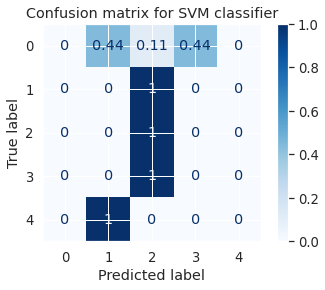

In [55]:
# Generate confusion matrix
# ref: https://www.youtube.com/watch?v=zUqa6KcwRhs&list=WL&index=8&t=671s
from sklearn.metrics import plot_confusion_matrix
matrix = plot_confusion_matrix(svmClf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for SVM classifier')
# plt.show(matrix)
# plt.show()